### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

GitHub:  https://github.com/wbasnight/AIML

#### 1. Import the necessary packages - 2.5 marks

In [1]:
# importing the appropriate libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
 #reading in the data files
data = pd.read_csv('data.csv') 
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

In [7]:
# displays the view first 5 rows of data.csv
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
# displays the view first 5 rows of item.csv
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# displays the view first 5 rows of user.csv
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [10]:
# displays the info for data.csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [11]:
# displays the info for item.csv
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
# displays the info for user.csv
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [13]:
# displays the shape of the data in the data dataframe.
data.shape

(100000, 4)

In [14]:
# displays the shape of the data in the item dataframe.
item.shape

(1681, 22)

In [15]:
# displays the shape of the data in the user dataframe.
user.shape

(943, 5)

In [16]:
# diplays the five number summary of the data dataframe.
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [17]:
# displays the five number summary of the item dataframe.
item.describe().T 

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [18]:
# displays the five number summary of the item dataframe.
user.describe().T 

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [19]:
# displays the number of missing values.
pd.DataFrame( data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
user id,0
movie id,0
rating,0
timestamp,0


In [20]:
# displays the number of missing values.
pd.DataFrame( item.isnull().sum(), columns= ['Number of missing values']) 

,Number of missing values
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [21]:
# displays the number of missing values.
pd.DataFrame( user.isnull().sum(), columns= ['Number of missing values']) 

,Number of missing values
user id,0
age,0
gender,0
occupation,0
zip code,0


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [77]:
# use sum on the default axis
dfTM=pd.DataFrame( item.sum(), columns= ['Total Movies']) 
dfTM.loc['unknown':'Western']

,Total Movies
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 5 marks

In [80]:
#finds all the movies with more than one genre, using .sum(), subtracting the index-'movie id'
dfMG=pd.DataFrame({'Movie' : item['movie title'], 'Multiple Genres' : item.sum(axis=1)-item['movie id']})


In [81]:
#compares the 'Multiple Genres' column to be greater than 1 
dfMG.loc[dfMG['Multiple Genres'] > 1]

,Movie,Multiple Genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [59]:
#finds the movie labled "unknown" genre
df =pd.DataFrame(item)
df[df.unknown == 1] #displays the dataframe

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# removes the row labeled "unknown" genre
df =pd.DataFrame(item)
df.drop(df.loc[df['unknown']==1].index, inplace=True)

In [27]:
df[df.unknown == 1] #displays the dataframe

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

<AxesSubplot:xlabel='rating', ylabel='count'>

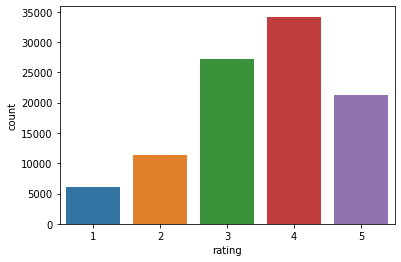

In [28]:
#countplot graph for rating

rating = data['rating']
sns.countplot(rating)

<AxesSubplot:xlabel='age'>

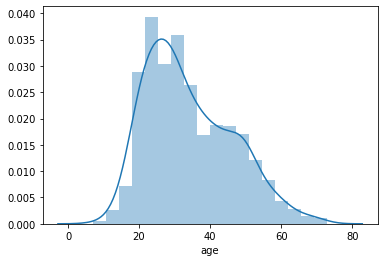

In [29]:
#displot graph for age

age= user['age']
sns.distplot(age)

<AxesSubplot:xlabel='gender', ylabel='count'>

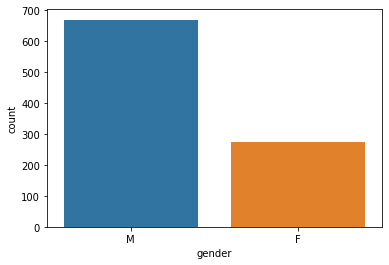

In [37]:
#countplot graph for gender

gender= user['gender']
sns.countplot(gender)

<AxesSubplot:xlabel='occupation', ylabel='count'>

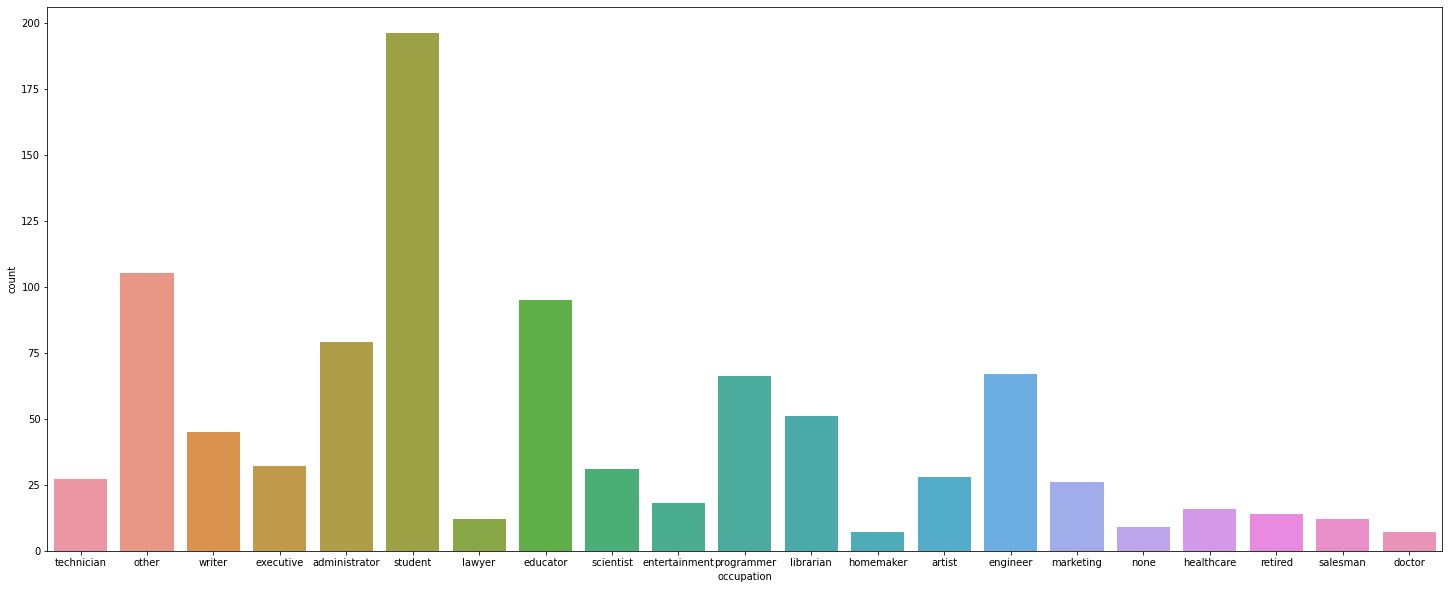

In [38]:
#countplot graph for occupation

occupation = user['occupation']
plt.figure(figsize=(25,10))
sns.countplot(occupation)

In [31]:
#pulls the year from the date

df['year'] = pd.DatetimeIndex(df['release date']).year
df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


<AxesSubplot:xlabel='year', ylabel='count'>

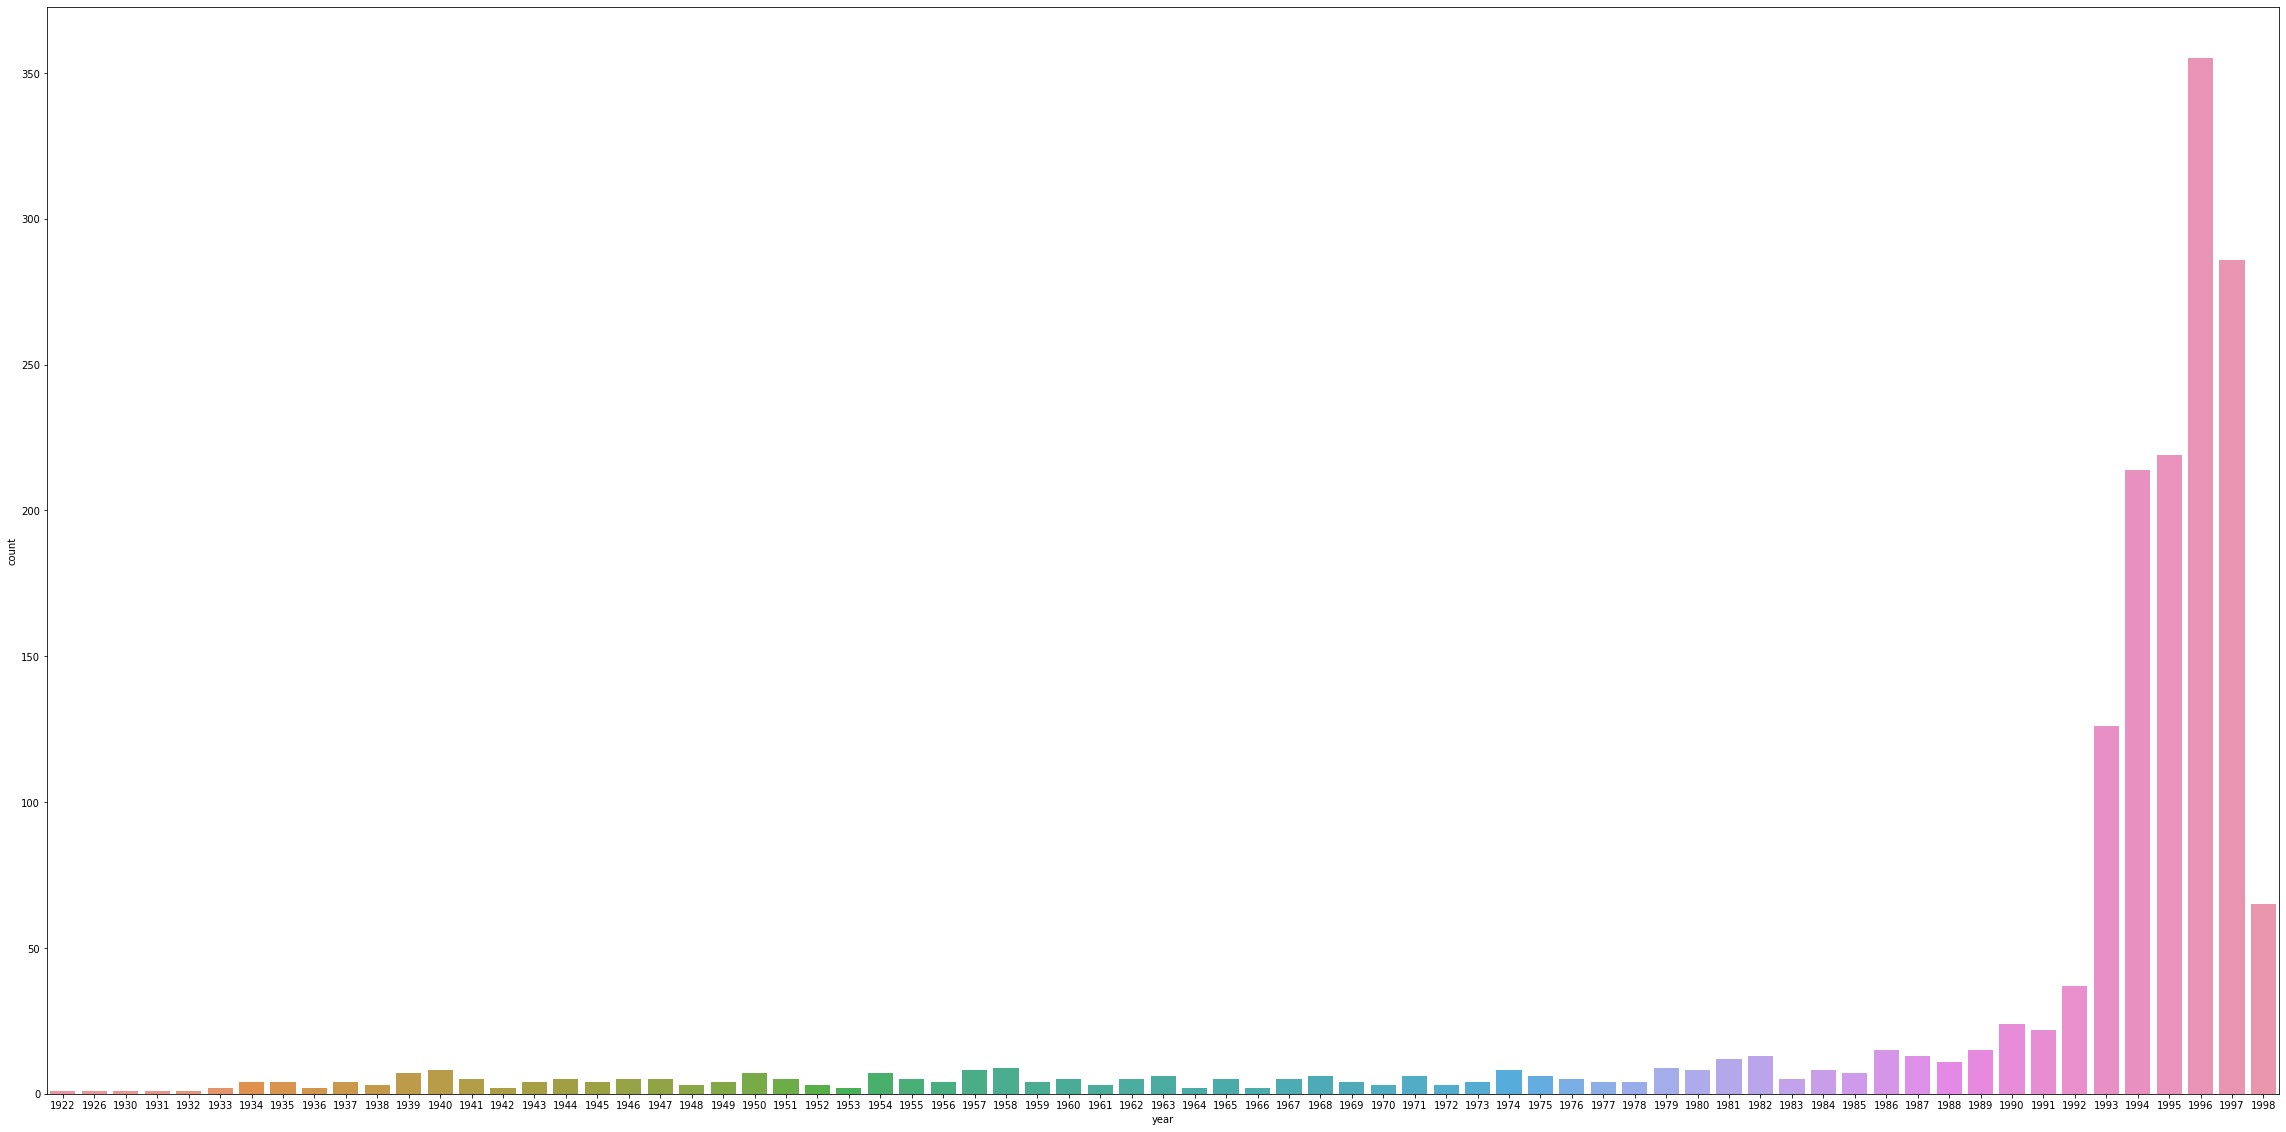

In [36]:
#countplot graph for Release year

Ryear = df['year']
plt.figure(figsize=(40,20))
sns.countplot(Ryear)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

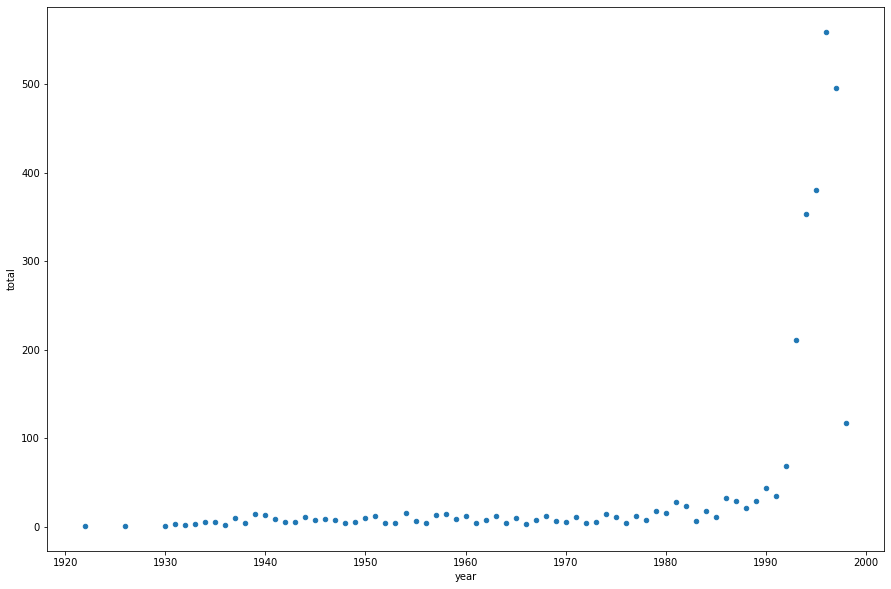

In [39]:
df['total']=pd.DataFrame(item.sum(axis=1)-item['movie id']) 
df.groupby(by=['year'])['total'].sum().reset_index().sort_values(['year'],ascending=True).plot(x='year',y='total',kind='scatter', figsize=(15,10))
plt.show()


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [40]:
#merging data columns with item columns
df2 =pd.DataFrame(item)
df3 = pd.DataFrame(data)
df4=df2.merge(df3, left_on='movie id', right_on='movie id', how='left', indicator=False)
df4.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,66,3,883601324


In [42]:
#finding the average(mean) of the ratings
dfmean = pd.DataFrame(df4.groupby(by=['movie id','movie title'])['rating'].mean())
dfmean.head()

,,rating
movie id,movie title,
1,Toy Story,3.878319
2,GoldenEye,3.206107
3,Four Rooms,3.033333
4,Get Shorty,3.550239
5,Copycat,3.302326


In [44]:
#grouping by the 'movie title' column and counting the number of entries
df5= df4.groupby(by=['movie title']).count()
df5.head()

,movie id,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1-900,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
101 Dalmatians,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
12 Angry Men,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
187,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


In [45]:
#merge average ratings column 
df6= df5.merge(dfmean, left_on='movie title', right_on='movie title', how='left', indicator=False)
df6.head()

,movie id,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating_x,timestamp,rating_y
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,2.333333
1-900,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,2.600000
101 Dalmatians,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,2.908257
12 Angry Men,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,4.344000
187,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,3.024390


In [66]:
#Finding the ratings > 100 and sorting in descending order
df7= df6[(df6['rating_x'] > 100)].sort_values('rating_x', ascending=False)

In [67]:
#renaming columns rating_x and rating_y to 'rating' and 'average rating'
df7.rename(columns={'rating_x':'rating', 'rating_y':'average rating'}, inplace=True)

In [74]:
df7.head()

,movie id,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp,average rating
movie title,,,,,,,,,,,,,,,,,,,,,
Star Wars,583,583,583,583,583,583,583,583,583,583,...,583,583,583,583,583,583,583,583,583,4.358491
Contact,509,509,509,509,509,509,509,509,509,509,...,509,509,509,509,509,509,509,509,509,3.803536
Fargo,508,508,508,508,508,508,508,508,508,508,...,508,508,508,508,508,508,508,508,508,4.155512
Return of the Jedi,507,507,507,507,507,507,507,507,507,507,...,507,507,507,507,507,507,507,507,507,4.007890
Liar Liar,485,485,485,485,485,485,485,485,485,485,...,485,485,485,485,485,485,485,485,485,3.156701


In [75]:
#filtering by only columns needed

FinalDf=df7[['average rating', 'rating']]

In [76]:
#final dataframe of the top 25 movies with more than 100 ratings
FinalDf.head(25)


,average rating,rating
movie title,,
Star Wars,4.358491,583
Contact,3.803536,509
Fargo,4.155512,508
Return of the Jedi,4.007890,507
Liar Liar,3.156701,485
"English Patient, The",3.656965,481
Scream,3.441423,478
Toy Story,3.878319,452
Air Force One,3.631090,431


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [3]:
#The steps of thought to generate and conclude the validity of the statements:
#find out total number of drama (based on movie id), using the item file
#use movie id to find the user id, using the data file
#use the user id to find the gender, using the user file

#assigning the dataframes
dfitem= pd.DataFrame(item)
dfdata = pd.DataFrame(data)
dfuser = pd.DataFrame(user)

In [5]:
#merging data file with item file using 'movie id'
mergedData=dfitem.merge(dfdata, on='movie id')
mergedData.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,66,3,883601324


In [6]:
#merging the merged itema file data with user file using 'user id'
mergedData2=mergedData.merge(dfuser, on='user id')
mergedData2.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,308,5,887736696,60,M,retired,95076


In [ ]:
#Men watch more drama than women?

In [7]:
#creates the dataframe of 'Drama' genre that has a 1 in the column and calulates the total
Drama=mergedData2.loc[mergedData2['Drama']==1]
DramaTotal=mergedData2.loc[mergedData2['Drama']==1].count() #used for calculating the percentage

In [8]:
#Grouping the dataframe by the gender and counting the number of ratings per gender
dfDrama=pd.DataFrame(Drama.groupby(by=['gender']).count().reset_index())

In [11]:
#separating the genders into separate dataframes for caluclating the percentage
DramaM=dfDrama.loc[dfDrama['gender']=='M']
DramaF=dfDrama.loc[dfDrama['gender']=='F']

In [12]:
#calculating the percentages of both males and females
dfPercentM= DramaM['Drama']/(DramaTotal['Drama'])*100
dfPercentF=DramaF['Drama']/(DramaTotal['Drama'])*100

In [13]:
dfPercentM #displaying the percentage result- males

1    72.40757
Name: Drama, dtype: float64

In [14]:
dfPercentF #displaying the percentage result- females

0    27.59243
Name: Drama, dtype: float64

In [ ]:
#Women watch more Sci-Fi than men?

In [16]:
#creates the dataframe of 'Sci-Fi' genre that has a 1 in the column and calulates the total
SciFi=mergedData2.loc[mergedData2['Sci-Fi']==1]
SciFiTotal=mergedData2.loc[mergedData2['Sci-Fi']==1].count() #used for calculating the percentage

In [17]:
#Grouping the dataframe by the gender and counting the number of ratings per gender
dfSciFi=pd.DataFrame(SciFi.groupby(by=['gender']).count().reset_index())

In [18]:
#separating the genders into separate dataframes for caluclating the percentage
SciFiM=dfSciFi.loc[dfSciFi['gender']=='M']
SciFiF=dfSciFi.loc[dfSciFi['gender']=='F']

In [19]:
#calculating the percentages of both males and females
dfSciFiPercentM= SciFiM['Sci-Fi']/(SciFiTotal['Sci-Fi'])*100
dfSciFiPercentF= SciFiF['Sci-Fi']/(SciFiTotal['Sci-Fi'])*100

In [20]:
dfSciFiPercentM

1    79.347997
Name: Sci-Fi, dtype: float64

In [21]:
dfSciFiPercentF

0    20.652003
Name: Sci-Fi, dtype: float64

In [ ]:
#Men watch more Romance than women?

In [22]:
#creates the dataframe of 'Romance' genre that has a 1 in the column and calulates the total
Romance=mergedData2.loc[mergedData2['Romance']==1]
RomanceTotal=mergedData2.loc[mergedData2['Romance']==1].count() #used for calculating the percentage

In [23]:
#Grouping the dataframe by the gender and counting the number of ratings per gender
dfRomance=pd.DataFrame(Romance.groupby(by=['gender']).count().reset_index())

In [24]:
#separating the genders into separate dataframes for caluclating the percentage
RomanceM=dfRomance.loc[dfRomance['gender']=='M']
RomanceF=dfRomance.loc[dfRomance['gender']=='F']

In [25]:
#calculating the percentages of both males and females
dfRoamncePercentM= RomanceM['Sci-Fi']/(RomanceTotal['Sci-Fi'])*100
dfRomancePercentF= RomanceF['Sci-Fi']/(RomanceTotal['Sci-Fi'])*100

In [26]:
dfRoamncePercentM

1    69.898772
Name: Sci-Fi, dtype: float64

In [27]:
dfRomancePercentF

0    30.101228
Name: Sci-Fi, dtype: float64

#### Conclusion:



To conclude the 3 points: 

Men watch more drama than women:
    The percentage of men who watched drama is 72% while the percentage of women who watched drama is 27%.
    
Women watch more Sci-Fi than men
    The percentage of women who watched Sci-Fi is 20% while the percentage of men who watched Sci-Fi is 79%.
    
Men watch more Romance than women
    The percentage of men who watched Romance is 69% while the percentage of women who watched Romance is 30%.

Based on the data and percentages, men watch more drama than women, men watch more Sci-Fi than women and men watch more Romance than women.  

This data shows clearly that men watch a lot of movies whereas women do not watch movies as much.

